<a href="https://colab.research.google.com/github/marinapor/Mis-tareas/blob/master/Semana5_Marina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

UNO

In [1]:
mi_lista = ["Hola", "mundo", "bienvenidos", "a", "un" ,"nuevo", "día", "lleno", "de", "aventuras"]
nueva_lista = list (map (lambda x: x[0] , mi_lista) )
print (nueva_lista)

['H', 'm', 'b', 'a', 'u', 'n', 'd', 'l', 'd', 'a']


In [2]:
mi_lista = ["Hola", "mundo", "bienvenidos", "a", "un", "nuevo", "día", "lleno", "de", "aventuras"]
nueva_lista = [x[0] for x in mi_lista]
nueva_lista

['H', 'm', 'b', 'a', 'u', 'n', 'd', 'l', 'd', 'a']

DOS

In [3]:
mi_lista = ["Hola", "mundo", "bienvenidos", "a", "un" "nuevo", "día", "lleno", "de", "aventuras"]
print (list(filter(lambda x: len(x)<=6, mi_lista)))

['Hola', 'mundo', 'a', 'día', 'lleno', 'de']


In [4]:
mi_lista = ["Hola", "mundo", "bienvenidos", "a", "un", "nuevo", "día", "lleno", "de", "aventuras"]
menores_cinco= [x for x in mi_lista if len(x) <= 6]
menores_cinco

['Hola', 'mundo', 'a', 'un', 'nuevo', 'día', 'lleno', 'de']

TRES

In [5]:
precios_pesos= [20.00, 50.00, 10000.00, 30000.00, 65000.00]
precios_dolares= list ( map(lambda x: x*20, precios_pesos) )
precios_dolares

[400.0, 1000.0, 200000.0, 600000.0, 1300000.0]

In [6]:
precios_pesos= [20.00, 50.00, 10000.00, 30000.00, 65000.00]
precios_dolares= [x*20 for x in precios_pesos]
precios_dolares

[400.0, 1000.0, 200000.0, 600000.0, 1300000.0]

PARTE DOS. EJERCICIO WEB SCRAPPING

In [0]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

sitio = requests.get("https://hogar.mercadolibre.com.mx/muebles-sillas-sillones-banquetas-sofas/")
the_soup = BeautifulSoup(sitio.text , "lxml")

In [0]:
articulos = the_soup.find_all("li", class_="results-item")


In [0]:
lista_ofertas=[]
lista_precios=[]
lista_articulos=[]

for a in articulos:
  lista_articulos.append(a.find('span', class_="main-title").get_text() )

for a in articulos:
  if a.find(class_="price__fraction") != "" :
    lista_ofertas.append(a.find('span', class_="price__fraction").get_text() )

for a in articulos:
  if a.find('del') !=None:
    lista_precios.append(a.find('span', class_="price-old").get_text() )
  else:
    lista_precios.append("No aplica")  



PRIMER DATA FRAME

In [104]:
tabla = pd.DataFrame( {"ARTICULO":lista_articulos, "PRECIO OFERTA":lista_ofertas, "PRECIO NORMAL":lista_precios} )
tabla.head()


,ARTICULO,PRECIO OFERTA,PRECIO NORMAL
0,Mueble Sala Sofa Cama Salas Esquinera Nuova H...,"6,590","$ 8,990"
1,Sillon Reposet Reclinable Durango Maximo Conf...,"3,990","$ 8,474"
2,"Práctico Sofá Cama, Dos Camas En Uno. Leer De...","3,695",No aplica
3,Muebles Salas En Esquina Sala Esquinera Españ...,"8,825","$ 9,290"
4,Sofa Cama Varias Posiciones Sillon Minimalist...,"2,359",No aplica


SEGUNDO DATA FRAME CON DATOS FLOAT

In [0]:
import re
import string

def convertidor (lista):

 lista_limpia =[] 
 for x in lista:
     x=re.sub (',', "", x) 
     lista_limpia.append(x)

 listaFloat= [float(x) for x in lista_limpia]

 
 return listaFloat


In [0]:
import re
import string

def convertidorConHuecos(lista):

  lista_float = []

  for x in lista:
    if x !="No aplica":
      x = re.sub (',', "", x)
      x= x[4:]
      x= float(x)
      lista_float.append(x)
    else:
     lista_float.append("No aplica")

  return lista_float

In [0]:
#ofertas_float = convertidor (lista_ofertas)
precios_float = convertidorConHuecos (lista_precios)
print (precios_float)
len (precios_float)


In [113]:
tabla = pd.DataFrame( {"ARTICULO":lista_articulos, "PRECIO OFERTA":ofertas_float, "PRECIO NORMAL":precios_float} )
tabla.head()

,ARTICULO,PRECIO OFERTA,PRECIO NORMAL
0,Mueble Sala Sofa Cama Salas Esquinera Nuova H...,6590.0,8990
1,Sillon Reposet Reclinable Durango Maximo Conf...,3990.0,8474
2,"Práctico Sofá Cama, Dos Camas En Uno. Leer De...",3695.0,No aplica
3,Muebles Salas En Esquina Sala Esquinera Españ...,8825.0,9290
4,Sofa Cama Varias Posiciones Sillon Minimalist...,2359.0,No aplica


CONVERSIÓN A DÓLARES

In [0]:
def dolares(lista):
 dolares= [x/20 for x in lista]
 return dolares


In [0]:
def dolaresListaEspecial(lista):
 precios_dolares =[] 
 for x in lista:
   if x !="No aplica":
     x = x/20
     precios_dolares.append(x)
   else:
     precios_dolares.append("No aplica")
 return precios_dolares


In [0]:
ofertas_dolares = dolares(ofertas_float)
precio_dolares = dolaresListaEspecial(precios_float)

In [186]:
tabla_dólares = pd.DataFrame( {"ARTICULO":lista_articulos, "OFERTA (dólares)":ofertas_dolares, "PRECIO LISTA (dólares)":precio_dolares} )
tabla_dólares.head()

,ARTICULO,OFERTA (dólares),PRECIO LISTA (dólares)
0,Mueble Sala Sofa Cama Salas Esquinera Nuova H...,329.50,449.5
1,Sillon Reposet Reclinable Durango Maximo Conf...,199.50,423.7
2,"Práctico Sofá Cama, Dos Camas En Uno. Leer De...",184.75,No aplica
3,Muebles Salas En Esquina Sala Esquinera Españ...,441.25,464.5
4,Sofa Cama Varias Posiciones Sillon Minimalist...,117.95,No aplica


CONVERSIÓN A CSV

In [0]:
tabla_dólares.to_csv("tabla_dólares", header=False, index=False)

CREACION DE DATA FRAME EXTENDIDO A 3 PAGINAS DEL SITIO

In [0]:
#PRIMERA PAGINA
import requests
from bs4 import BeautifulSoup
import pandas as pd

sitio1 = requests.get("https://hogar.mercadolibre.com.mx/muebles-sillas-sillones-bancos/")
the_soup1 = BeautifulSoup(sitio1.text , "lxml")

In [0]:
articulos1 = the_soup1.find_all("li", class_="results-item")

In [0]:
lista_ofertas1=[]
lista_precios1=[]
lista_articulos1=[]

for a in articulos1:
  lista_articulos1.append(a.find('span', class_="main-title").get_text() )

for a in articulos1:
  if a.find(class_="price__fraction") != "" :
    lista_ofertas1.append(a.find('span', class_="price__fraction").get_text() )

for a in articulos1:
  if a.find('del') !=None:
    lista_precios1.append(a.find('span', class_="price-old").get_text() )
  else:
    lista_precios1.append("No aplica")  


In [190]:
# DATA FRAME1
tabla1 = pd.DataFrame( {"ARTICULO":lista_articulos1,  "PRECIO OFERTA":lista_ofertas1,  "PRECIO NORMAL":lista_precios1} )
tabla1.head()

,ARTICULO,PRECIO OFERTA,PRECIO NORMAL
0,Silla De Oficina Silla Ejecutiva Base Metalic...,"1,029",No aplica
1,Silla De Oficina Silla Ejecutiva Base Metalic...,"1,049",No aplica
2,Sala Capitonada Vintage En Esquina Linato Gri...,"4,999",No aplica
3,Sillón Reclinable Manual Moderno Brady 5954x,"6,399","$ 7,423"
4,Paquete De 4 Sillas Eames Hood Modernas Minim...,"3,990","$ 5,640"


In [0]:
# SEGUNDA PAGINA DEL CATALOGO

import requests
from bs4 import BeautifulSoup
import pandas as pd

sitio2 = requests.get("https://hogar.mercadolibre.com.mx/muebles-sillas-sillones-bancos/_Desde_51")
the_soup = BeautifulSoup(sitio2.text , "lxml")

In [0]:
articulos2= the_soup.find_all("li", class_="results-item")
lista_ofertas2=[]
lista_precios2=[]
lista_articulos2=[]

for a in articulos2:
  lista_articulos2.append(a.find('span', class_="main-title").get_text() )

for a in articulos2:
  if a.find(class_="price__fraction") != "" :
    lista_ofertas2.append(a.find('span', class_="price__fraction").get_text() )

for a in articulos2:
  if a.find('del') != None:
    lista_precios2.append(a.find('span', class_="price-old").get_text() )
  else:
    lista_precios2.append("No aplica")  


In [192]:
# DATA FRAME2
tabla2 = pd.DataFrame( {"ARTICULO":lista_articulos2,  "PRECIO OFERTA":lista_ofertas2,  "PRECIO NORMAL":lista_precios2} )
tabla2.head()

,ARTICULO,PRECIO OFERTA,PRECIO NORMAL
0,Silla Eames Hood Comedor Silla Moderna Retro ...,"2,290","$ 3,053"
1,Silla Oficina Escritorio Secretarial Silla Er...,899,No aplica
2,Silla De Oficina Silla Ejecutiva Base Metalic...,"1,029",No aplica
3,Silla Oficina Secretarial Escritorio Respaldo...,829,No aplica
4,Sofa Cama Individual Sofacama Salas Mobydec H...,"5,215","$ 5,490"


In [0]:
# TERCERA PAGINA DEL CATALOGO

import requests
from bs4 import BeautifulSoup
import pandas as pd

sitio3 = requests.get("https://hogar.mercadolibre.com.mx/muebles-sillas-sillones-bancos/_Desde_101")
the_soup = BeautifulSoup(sitio3.text , "lxml")

articulos3= the_soup.find_all("li", class_="results-item")
lista_ofertas3=[]
lista_precios3=[]
lista_articulos3=[]

for a in articulos3:
  lista_articulos3.append(a.find('span', class_="main-title").get_text() )

for a in articulos3:
  if a.find(class_="price__fraction") != "" :
    lista_ofertas3.append(a.find('span', class_="price__fraction").get_text() )

for a in articulos3:
  if a.find('del') != None:
    lista_precios3.append(a.find('span', class_="price-old").get_text() )
  else:
    lista_precios3.append("No aplica")  


In [193]:
# DATA FRAME3
tabla3= pd.DataFrame( {"ARTICULO":lista_articulos3,  "PRECIO OFERTA":lista_ofertas3,  "PRECIO NORMAL":lista_precios3} )
tabla3.head()

,ARTICULO,PRECIO OFERTA,PRECIO NORMAL
0,Sillas Cromwell Azul Oscuro 2 Unidades,"3,122",No aplica
1,Salas Esquineras Modernas Gales Lino + 3 Tabu...,"8,526","$ 16,227"
2,Sillón Individual Ocasional Romania + Envió G...,"2,890","$ 4,097"
3,"Sillon Reclinable, Doble, Innova, Mobydec Mue...","8,065","$ 8,490"
4,Sillon Reposet Reclinable Durango Maximo Conf...,"3,990","$ 8,474"


In [194]:
# CONCATENACIÓN DE TABLAS

tabla_extendida= pd.concat([tabla1, tabla2, tabla3])
tabla_extendida

,ARTICULO,PRECIO OFERTA,PRECIO NORMAL
0,Silla De Oficina Silla Ejecutiva Base Metalic...,"1,029",No aplica
1,Silla De Oficina Silla Ejecutiva Base Metalic...,"1,049",No aplica
2,Sala Capitonada Vintage En Esquina Linato Gri...,"4,999",No aplica
3,Sillón Reclinable Manual Moderno Brady 5954x,"6,399","$ 7,423"
4,Paquete De 4 Sillas Eames Hood Modernas Minim...,"3,990","$ 5,640"
...,...,...,...
48,Silla Sillon Ejecutivo Gerencial Premium Envi...,"1,499",No aplica
49,Liquidación Sillón Reclinable 10 En 1 De Impo...,"12,499",No aplica
50,Diván Para Psicoterapia Con Envío Gratis A To...,"8,390",No aplica
51,"Sofa-cama Futon, Tres Posiciones(sofa, Repose...","3,200",No aplica


 9. DATA FRAME CON LA CONVERSIÓN DE COLUMNAS A TIPO FLOAT

In [195]:
ofertas_float1 = convertidor(lista_ofertas1)
ofertas_float2 = convertidor(lista_ofertas2)
ofertas_float3 = convertidor(lista_ofertas3)
precios_float1 = convertidorConHuecos(lista_precios1)
precios_float2 = convertidorConHuecos(lista_precios2)
precios_float3 = convertidorConHuecos(lista_precios3)
tabla1_float = pd.DataFrame( {"ARTICULO":lista_articulos1,  "PRECIO OFERTA":ofertas_float1,  "PRECIO NORMAL":precios_float1} )
tabla2_float = pd.DataFrame( {"ARTICULO":lista_articulos2,  "PRECIO OFERTA":ofertas_float2,  "PRECIO NORMAL":precios_float2} )
tabla3_float = pd.DataFrame( {"ARTICULO":lista_articulos3,  "PRECIO OFERTA":ofertas_float3,  "PRECIO NORMAL":precios_float3} )
tabla_extendidaFloat = pd.concat([tabla1_float, tabla2_float, tabla3_float])
tabla_extendidaFloat

,ARTICULO,PRECIO OFERTA,PRECIO NORMAL
0,Silla De Oficina Silla Ejecutiva Base Metalic...,1029.0,No aplica
1,Silla De Oficina Silla Ejecutiva Base Metalic...,1049.0,No aplica
2,Sala Capitonada Vintage En Esquina Linato Gri...,4999.0,No aplica
3,Sillón Reclinable Manual Moderno Brady 5954x,6399.0,7423
4,Paquete De 4 Sillas Eames Hood Modernas Minim...,3990.0,5640
...,...,...,...
48,Silla Sillon Ejecutivo Gerencial Premium Envi...,1499.0,No aplica
49,Liquidación Sillón Reclinable 10 En 1 De Impo...,12499.0,No aplica
50,Diván Para Psicoterapia Con Envío Gratis A To...,8390.0,No aplica
51,"Sofa-cama Futon, Tres Posiciones(sofa, Repose...",3200.0,No aplica


10. CREACION DE DATA FRAME EXTENDIDO CON VALORES EN DOLARES

In [196]:
dolares1 = dolares(ofertas_float1)
dolares2 = dolares(ofertas_float2)
dolares3 = dolares(ofertas_float3)
precios_dolares1 = dolaresListaEspecial(precios_float1) 
precios_dolares2 = dolaresListaEspecial(precios_float2) 
precios_dolares3 = dolaresListaEspecial(precios_float3)
tabla1_dolares = pd.DataFrame( {"ARTICULO":lista_articulos1,  "PRECIO OFERTA":dolares1,  "PRECIO NORMAL":precios_dolares1} )
tabla2_dolares = pd.DataFrame( {"ARTICULO":lista_articulos2,  "PRECIO OFERTA":dolares2,  "PRECIO NORMAL":precios_dolares2} )
tabla3_dolares = pd.DataFrame( {"ARTICULO":lista_articulos3,  "PRECIO OFERTA":dolares3,  "PRECIO NORMAL":precios_dolares3} )
tabla_extendidaDolares = pd.concat([tabla1_dolares, tabla2_dolares, tabla3_dolares])
tabla_extendidaDolares


,ARTICULO,PRECIO OFERTA,PRECIO NORMAL
0,Silla De Oficina Silla Ejecutiva Base Metalic...,51.45,No aplica
1,Silla De Oficina Silla Ejecutiva Base Metalic...,52.45,No aplica
2,Sala Capitonada Vintage En Esquina Linato Gri...,249.95,No aplica
3,Sillón Reclinable Manual Moderno Brady 5954x,319.95,371.15
4,Paquete De 4 Sillas Eames Hood Modernas Minim...,199.50,282
...,...,...,...
48,Silla Sillon Ejecutivo Gerencial Premium Envi...,74.95,No aplica
49,Liquidación Sillón Reclinable 10 En 1 De Impo...,624.95,No aplica
50,Diván Para Psicoterapia Con Envío Gratis A To...,419.50,No aplica
51,"Sofa-cama Futon, Tres Posiciones(sofa, Repose...",160.00,No aplica


11. HISTOGRAMA DE DISTRIBUCIÓN DE PRECIOS EN DOLARES

In [197]:
frame = tabla_extendidaDolares.iloc [:,[0,1] ]
frame

,ARTICULO,PRECIO OFERTA
0,Silla De Oficina Silla Ejecutiva Base Metalic...,51.45
1,Silla De Oficina Silla Ejecutiva Base Metalic...,52.45
2,Sala Capitonada Vintage En Esquina Linato Gri...,249.95
3,Sillón Reclinable Manual Moderno Brady 5954x,319.95
4,Paquete De 4 Sillas Eames Hood Modernas Minim...,199.50
...,...,...
48,Silla Sillon Ejecutivo Gerencial Premium Envi...,74.95
49,Liquidación Sillón Reclinable 10 En 1 De Impo...,624.95
50,Diván Para Psicoterapia Con Envío Gratis A To...,419.50
51,"Sofa-cama Futon, Tres Posiciones(sofa, Repose...",160.00


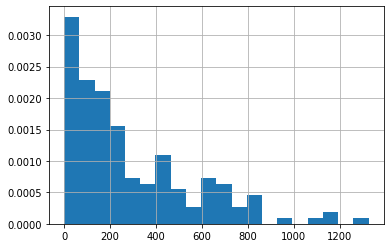

In [198]:
my_histogram = frame ["PRECIO OFERTA"]
my_histogram.hist(density = 1, histtype ="stepfilled" , bins = 20)
